In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
insurance_data = pd.read_csv("insurance.txt", delimiter=',')

In [38]:
insurance_data

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [39]:
norm_insu_data = ((insurance_data-insurance_data.mean())/(insurance_data.std()))
norm_insu_data.insert(0, 'x0', 1) #x0 is appeneded to allow for the zeroth order term

In [40]:
#normalised data frame

norm_insu_data

,x0,age,bmi,children,charges
0,1,-1.438227,-0.453151,-0.908274,0.298472
1,1,-1.509401,0.509431,-0.078738,-0.953333
2,1,-0.797655,0.383164,1.580335,-0.728402
3,1,-0.441782,-1.305043,-0.908274,0.719574
4,1,-0.512957,-0.292447,-0.908274,-0.776512
...,...,...,...,...,...
1333,1,0.768185,0.050278,1.580335,-0.220468
1334,1,-1.509401,0.206062,-0.908274,-0.913661
1335,1,-1.509401,1.014499,-0.908274,-0.961237
1336,1,-1.295877,-0.797515,-0.908274,-0.930014


In [41]:
#creating a list of 20 data_frames that have been shuffled

dataset_list=list()
dataset_list.append(norm_insu_data.sample(frac=1))
for i in range(1,20):
    dataset_list.append(dataset_list[-1].sample(frac=1))


In [42]:
# Splitting the datasets into testing and training

training_data_list = [None]*20
testing_data_list = [None]*20

for i in range(20):
    training_data_list[i] = dataset_list[i].sample(frac=0.7)
    testing_data_list[i] = dataset_list[i].drop(training_data_list[i].index)

In [43]:
# Normal equation method to find regression model

indep_attrs = ["x0", "age", "bmi", "children"]
dep_attr = ["charges"]

testing_err_norm = []
training_err_norm = []
for i in range(20):
    
    #Calculating the weights
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    XT_train = X_train.transpose()

    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    theta = np.matmul(np.linalg.inv(np.matmul(XT_train,X_train)),np.matmul(XT_train,Y_train))
    
    #Calculating RMSE for training data
    diff_train = np.subtract(np.matmul(X_train, theta), Y_train)
    diffT_train = diff_train.transpose()
    sumsq_train = np.matmul(diffT_train, diff_train)[0][0]
    rmse_train = np.sqrt(sumsq_train/(Y_train.shape[0]))
    training_err_norm.append(rmse_train)
    
    #Calculating RMSE for testing data

    diff_test = np.subtract(np.matmul(X_test, theta), Y_test)
    diffT_test = diff_test.transpose()
    sumsq_test = np.matmul(diffT_test, diff_test)[0][0]
    rmse_test = np.sqrt(sumsq_test/(Y_test.shape[0]))
    testing_err_norm.append(rmse_test)

In [44]:
#GRADIENT DESCENT FUNCTION DEFINITION
def gradient_descent(x, y, iterations, eta, x_test, y_test, precis):
    
    theta = np.random.rand(x.shape[1],1)
    m = y.shape[0]
    n = y_test.shape[0]
    past_costs_train = []
    past_costs_test= []
    past_rmse_train= []
    past_rmse_test= []
    for i in range(iterations):
        
        prediction_train = np.dot(x, theta)
        error_train = prediction_train - y
        cost_train = 1/(2*m) * np.dot(error_train.T, error_train)
        past_costs_train.append(cost_train[0][0])
        rmse_train = np.sqrt((2*(cost_train[0][0])))
        past_rmse_train.append(rmse_train)
        theta = theta - (eta * (1/m) * np.dot(x.T, error_train))
        
        prediction_test = np.dot(x_test, theta)
        error_test = prediction_test - y_test
        cost_test = 1/(2*n) * np.dot(error_test.T, error_test)
        past_costs_test.append(cost_test[0][0])
        rmse_test = np.sqrt((2*cost_test[0][0]))
        past_rmse_test.append(rmse_test)
        
        if((len(past_costs_train) > 1) and abs(past_costs_train[-2]-past_costs_train[-1]) <= precis):
            break
            
    return theta, past_costs_train, past_costs_test, past_rmse_train, past_rmse_test


In [45]:
# GRADIENT DESCENT IMPLEMENTATION ON 20 MODELS
past_rmse_train_grad_desc = [None]*20
past_rmse_test_grad_desc = [None]*20
past_costs = [None]*20
past_costs_test = [None]*20
precision = 0.000001
eta = 0.01
iterations = 2000
for i in range(20):
    
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    
    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    
    final_theta, past_costs[i], past_costs_test[i], past_rmse_train_grad_desc[i], past_rmse_test_grad_desc[i] = gradient_descent(X_train, Y_train, iterations, eta, X_test, Y_test, precision)
    
    #printing error values for learning rate=0.01 , 20 models.
    print ("Error values (every 50th iteration) for model number",i+1,":-\n")
    for x in range(len(past_rmse_train_grad_desc[i])): 
        if x%50==0:
            print(past_rmse_train_grad_desc[i][x], sep = "\n") 
    print ("\n")


Error values (every 50th iteration) for model number 1 :-

1.1941438628724366
1.0451936131880128
0.9874741816402929
0.9662506146431259
0.9585978024887601
0.9558490922352206
0.9548593486946941
0.9545011492392856
0.9543707042067211


Error values (every 50th iteration) for model number 2 :-

1.0834442884293605
0.9986777303656074
0.9666981057362065
0.9548649238610807
0.950475992164318
0.9488295867619236
0.9482030374652748
0.9479610314445145
0.9478662195896552


Error values (every 50th iteration) for model number 3 :-

1.430053794690965
1.1204088259800555
0.9855639643582136
0.9321524647766343
0.912054229802395
0.9046453051146072
0.9019294921434515
0.9009333987310847
0.9005668892909561
0.9004314362098402


Error values (every 50th iteration) for model number 4 :-

1.5795966837057565
1.1988038214135308
1.0353102338429525
0.9721107795635425
0.9490235276504865
0.9407608031526998
0.9378128983877739
0.936757075320573
0.9363764224574808
0.9362381368263663


Error values (every 50th iteration) fo

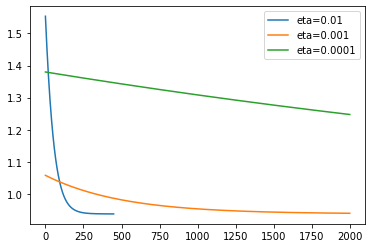

In [46]:
#Now using 20th model to compare effect of learning rate on GD

X_train = training_data_list[19][indep_attrs].to_numpy() 
Y_train = training_data_list[19][dep_attr].to_numpy()
    
X_test = testing_data_list[19][indep_attrs].to_numpy() 
Y_test = testing_data_list[19][dep_attr].to_numpy()

precision = 0.000001
eta2=0.001
eta3=0.0001

final_theta2, past_costs_train2, past_costs_test2, past_rmse_train_grad_desc2, past_rmse_test_grad_desc3 = gradient_descent(X_train, Y_train, iterations, eta2, X_test, Y_test, precision)
final_theta3, past_costs_train3, past_costs_test3, past_rmse_train_grad_desc3, past_rmse_test_grad_desc3 = gradient_descent(X_train, Y_train, iterations, eta3, X_test, Y_test, precision)

plt.plot(past_rmse_train_grad_desc[19], label="eta=0.01")
plt.plot(past_rmse_train_grad_desc2, label="eta=0.001")
plt.plot(past_rmse_train_grad_desc3, label="eta=0.0001")
plt.legend()


In [47]:
# STOCHASTIC GRADIENT DESCENT FUNCTION DEFINITION

def stoch_grad(x, y, iterations, eta, x_test, y_test, precis):
    theta = np.random.rand(x.shape[1],1)
    m = y.shape[0]
    n = y_test.shape[0]
    past_costs = []
    past_costs_test= []
    past_rmse= []
    past_rmse_test= []
    for i in range(iterations):
        np.random.shuffle(x)
        mse = 0
        for j in range(x.shape[0]):
            row_j = np.matrix(x[j])
            prediction = np.matmul(row_j, theta)
            xT = row_j.transpose()
            diff = prediction - np.matrix(y[j])
            theta = theta - eta*np.matmul(xT, diff)
        
        diff_t = np.matmul(x, theta)-y
        mse = (1/m)*(np.matmul(diff_t.T, diff_t))
        mse_val = np.array(mse)[0][0]
        past_costs.append(mse_val)
        past_rmse.append(np.sqrt(mse_val))
        
        diff_test = np.matmul(x_test,theta) - y_test
        mse_test = (1/n)*(np.matmul(diff_test.T, diff_test))
        mse_test_val = np.array(mse_test)[0][0]
        past_costs_test.append(mse_test_val)
        past_rmse_test.append(np.sqrt(mse_test_val))
        if((len(past_costs) > 1) and abs(past_costs[-2]-past_costs[-1]) <= precis):
            break
    return theta, past_costs, past_costs_test, past_rmse, past_rmse_test   

            

In [48]:
# STOCHASTIC GRADIENT DESCENT IMPLEMENTATION ON 20 MODELS
past_rmse_train_sgd = [None]*20
past_rmse_test_sgd = [None]*20
past_costs_train_gd = [None]*20
past_costs_test_gd = [None]*20
precision = 0.000001
eta = 0.001
iterations = 200
for i in range(20):
    
    X_train = training_data_list[i][indep_attrs].to_numpy() 
    Y_train = training_data_list[i][dep_attr].to_numpy()
    
    X_test = testing_data_list[i][indep_attrs].to_numpy() 
    Y_test = testing_data_list[i][dep_attr].to_numpy()
    
    final_theta, past_costs_train_gd[i], past_costs_test_gd[i], past_rmse_train_sgd[i], past_rmse_test_sgd[i] = stoch_grad(X_train, Y_train, iterations, eta, X_test, Y_test, precision)
    
    #printing error values for learning rate=0.01 , 20 models.
    print ("Error values (every 50th iteration) for model number",i+1,":-\n")
    for x in range(len(past_rmse_train_sgd[i])): 
        if x%50==0:
            print(past_rmse_train_sgd[i][x], sep = "\n") 
    print ("\n")


Error values (every 50th iteration) for model number 1 :-

1.1355551457096764
1.0127893171336135
1.0138873274209814
1.0076564635136076


Error values (every 50th iteration) for model number 2 :-

1.1502100659195094
1.0056322916246492
1.0037632028654409
1.0072345019187272


Error values (every 50th iteration) for model number 3 :-

1.1076893027345638
0.9566867229671194
0.9571040595818999
0.9568149598045675


Error values (every 50th iteration) for model number 4 :-

1.0809777630626305
0.9961244205715056
0.9961296498516425
0.9956155939126029


Error values (every 50th iteration) for model number 5 :-

1.077416861677192
0.9782454948965769
0.9774978749549352
0.9779969851124036


Error values (every 50th iteration) for model number 6 :-

1.1761728189961438
1.0149072987048575
1.0133096437624638
1.0149485074707774


Error values (every 50th iteration) for model number 7 :-

1.0169945259112476
0.985010555314639
0.9845616467899095
0.9853746152345818


Error values (every 50th iteration) for mod

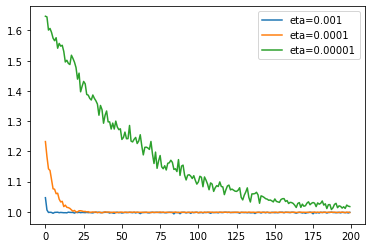

In [49]:
#Now using 20th model to compare effect of learning rate on SGD

X_train = training_data_list[19][indep_attrs].to_numpy() 
Y_train = training_data_list[19][dep_attr].to_numpy()
    
X_test = testing_data_list[19][indep_attrs].to_numpy() 
Y_test = testing_data_list[19][dep_attr].to_numpy()

precision = 0.0000001
eta2=0.0001
eta3=0.00001

final_theta2, past_costs_train2, past_costs_test2, past_rmse_train_sgd2, past_rmse_test_sgd3 = stoch_grad(X_train, Y_train, iterations, eta2, X_test, Y_test, precision)
final_theta3, past_costs_train3, past_costs_test3, past_rmse_train_sgd3, past_rmse_test_sgd3 = stoch_grad(X_train, Y_train, iterations, eta3, X_test, Y_test, precision)

plt.plot(past_rmse_train_sgd[19], label="eta=0.001")
plt.plot(past_rmse_train_sgd2, label="eta=0.0001")
plt.plot(past_rmse_train_sgd3, label="eta=0.00001")
plt.legend()

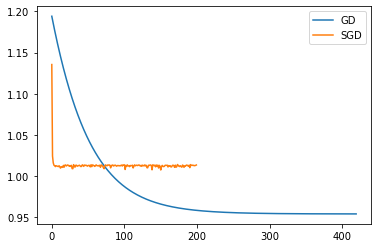

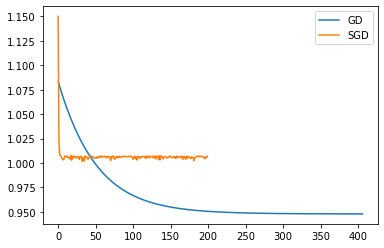

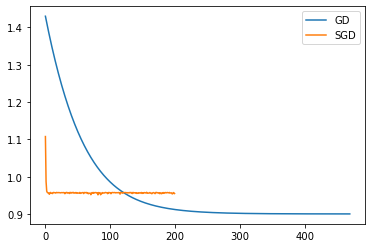

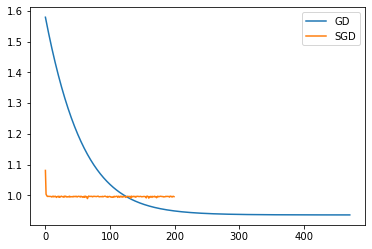

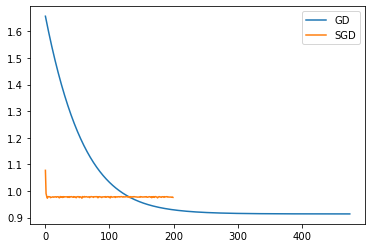

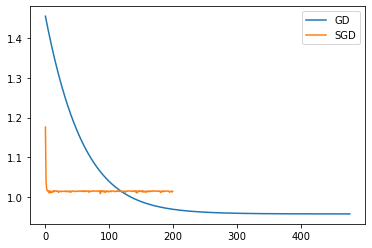

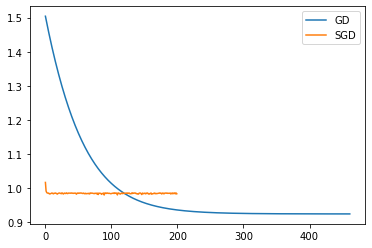

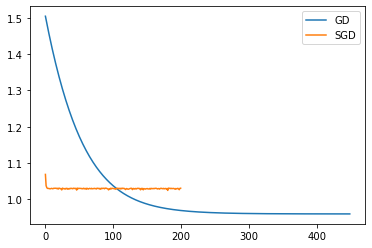

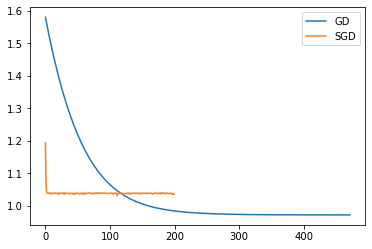

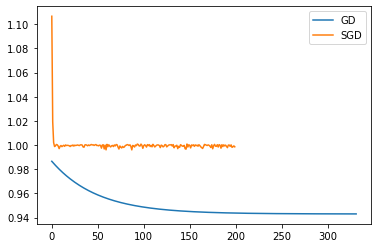

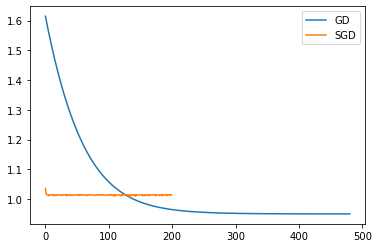

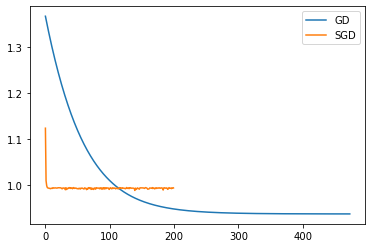

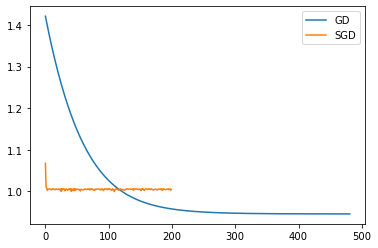

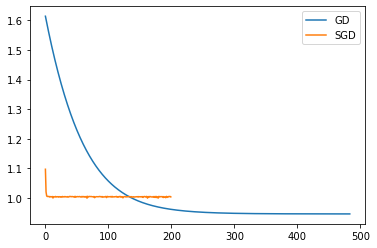

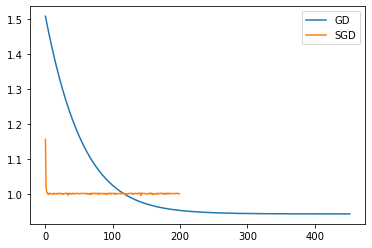

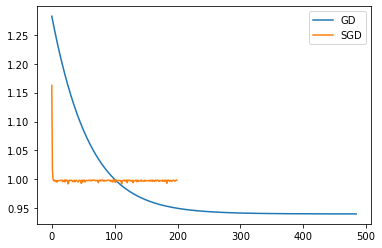

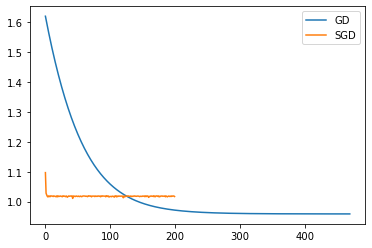

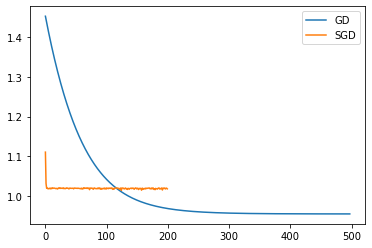

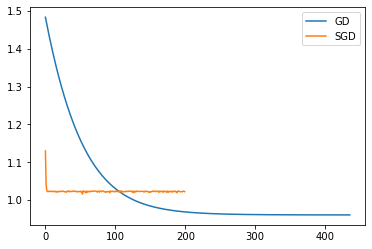

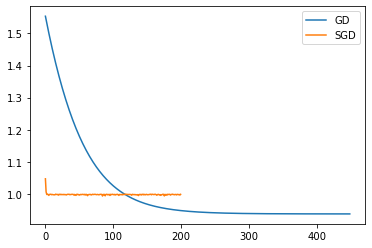

In [50]:
#Now comparing GD and SGD for all 20 models
for x in range(20):
    plt.figure()
    plt.plot(past_rmse_train_grad_desc[x], label="GD")
    plt.plot(past_rmse_train_sgd[x], label="SGD")
    plt.legend()


In [51]:
#Creating data frame to highlight min rmse across the models
min_rmse_train_table_gd=[None]*20
min_rmse_test_table_gd=[None]*20
min_rmse_train_table_sgd=[None]*20
min_rmse_test_table_sgd=[None]*20
for x in range(20):
    min_rmse_train_table_gd[x]=past_rmse_train_grad_desc[x][len(past_rmse_train_grad_desc[x])-1]
    min_rmse_test_table_gd[x]=past_rmse_test_grad_desc[x][len(past_rmse_test_grad_desc[x])-1]
    min_rmse_train_table_sgd[x]=past_rmse_train_sgd[x][len(past_rmse_train_sgd[x])-1]
    min_rmse_test_table_sgd[x]=past_rmse_test_sgd[x][len(past_rmse_test_sgd[x])-1]

df = pd.DataFrame(list(zip(training_err_norm , min_rmse_train_table_gd, min_rmse_train_table_sgd, testing_err_norm ,  min_rmse_test_table_gd, min_rmse_test_table_sgd)), 
     index =['1', '2', '3', '4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'], columns =['NE train', 'GD train' , 'SGD train' , 'NE test', 'GD test' , 'SGD test']) 
df

,NE train,GD train,SGD train,NE test,GD test,SGD test
1,0.954295,0.954347,1.013717,0.899141,0.899330,0.966101
2,0.947803,0.947860,1.006973,0.915064,0.914054,0.984936
3,0.900351,0.900406,0.955027,1.024741,1.023072,1.104741
4,0.936158,0.936211,0.995637,0.941305,0.941484,0.999447
5,0.913433,0.913485,0.975773,0.993666,0.993094,1.066659
6,0.957159,0.957212,1.014226,0.891658,0.892268,0.956853
7,0.924755,0.924807,0.983706,0.968480,0.968329,1.028590
8,0.959866,0.959914,1.030709,0.886386,0.886466,0.930918
9,0.972557,0.972607,1.036166,0.854141,0.855325,0.894673
10,0.943000,0.943052,0.998577,0.926146,0.926407,0.988985


In [52]:
#Trying to figure out the best algorithm
wins_NE_train=0
wins_GD_train=0
wins_SGD_train=0
wins_NE_test=0
wins_GD_test=0
wins_SGD_test=0
for x in range(20):
    if(training_err_norm[x]<min(min_rmse_train_table_gd[x],min_rmse_train_table_sgd[x])):
        wins_NE_train+=1
    elif(min_rmse_train_table_gd[x]<min(training_err_norm[x],min_rmse_train_table_sgd[x])):
        wins_GD_train+=1
    else:
        wins_SGD_train+=1
            
    if(testing_err_norm[x]<min(min_rmse_test_table_gd[x],min_rmse_test_table_sgd[x])):
        wins_NE_test+=1
            
    elif(min_rmse_test_table_gd[x]<min(testing_err_norm[x],min_rmse_test_table_sgd[x])):
        wins_GD_test+=1
    else:
        wins_SGD_test+=1        

wins = {'Number of training wins':[wins_NE_train, wins_GD_train, wins_SGD_train], 'Number of testing wins':[wins_NE_test, wins_GD_test, wins_SGD_test]}
df = pd.DataFrame(wins,index=['NE','GD','SGD'])
df

,Number of training wins,Number of testing wins
NE,20,13
GD,0,7
SGD,0,0
